
Mean Word Count: 1000.1726057906459
Standard Deviation of Word Count: 534.3378038257393


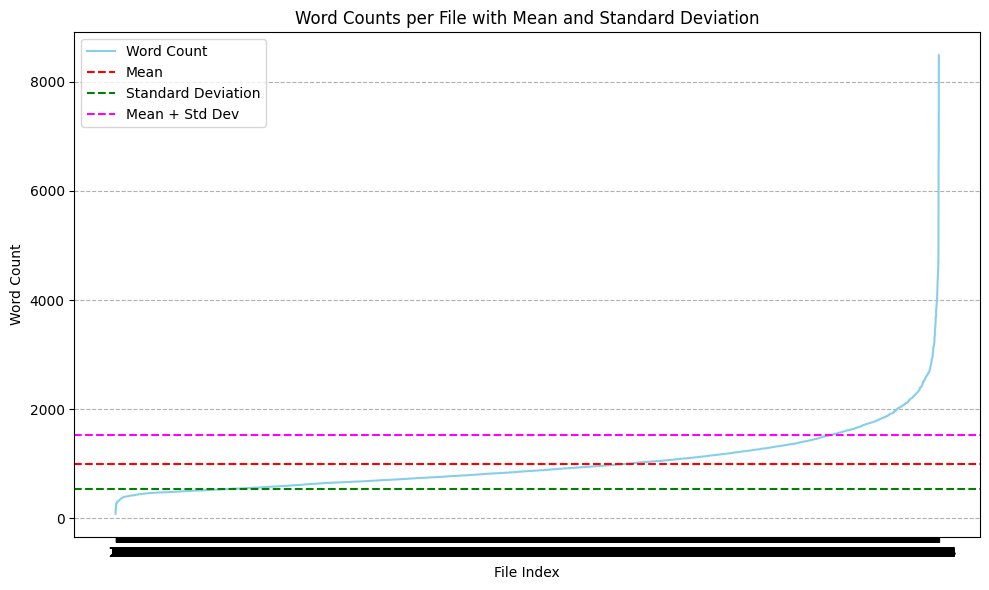

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def count_words_in_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
    words = text.split()
    return len(words)

def word_count_stats(directory_path):
    word_counts = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory_path, filename)
            word_count = count_words_in_file(filepath)
            word_counts.append(word_count)
            #print(f"File: {filename}, Word Count: {word_count}")
    
    if word_counts:
        sorted_indices = np.argsort(word_counts)
        sorted_word_counts = np.array(word_counts)[sorted_indices]
        #sorted_filenames = np.array(filenames)[sorted_indices]

        
        mean_count = np.mean(sorted_word_counts)
        std_dev_count = np.std(sorted_word_counts)
        mean_plus_std = mean_count + std_dev_count
        
        print(f"\nMean Word Count: {mean_count}")
        print(f"Standard Deviation of Word Count: {std_dev_count}")
        
        # Plotting
        file_index = np.arange(1, len(word_counts) + 1)
        
        plt.figure(figsize=(10, 6))
        plt.plot(file_index, sorted_word_counts, color='skyblue', label='Word Count')
        plt.axhline(mean_count, color='red', linestyle='--', label='Mean')
        plt.axhline(std_dev_count, color='green', linestyle='--', label='Standard Deviation')
        plt.axhline(mean_plus_std, color='magenta', linestyle='--', label='Mean + Std Dev')

        plt.xlabel('File Index')
        plt.ylabel('Word Count')
        plt.title('Word Counts per File with Mean and Standard Deviation')
        plt.xticks(file_index)  # Set x-ticks to file indices
        plt.legend()
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()
    else:
        print("No .txt files found in the specified directory.")

# Example usage:
directory_path = './investopedia-dictionary'  # Replace with your directory path
word_count_stats(directory_path)